In [2]:
from google.oauth2 import service_account
import pandas_gbq

In [3]:
path = '/Users/truongnm/Desktop/teaching-dataset-38467351fe2a.json'

credentials = service_account.Credentials.from_service_account_file(path)

sql = "SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` LIMIT 1000"

df = pandas_gbq.read_gbq(sql, project_id="teaching-dataset", credentials=credentials)

Downloading: 100%|██████████| 1000/1000 [00:01<00:00, 866.20rows/s]


In [4]:
df.head(2)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-27979200092,2020-06-15,2619,Hy-Vee Wine and Spirits / WDM,1725 74th St,West Des Moines,50266,POINT (-93.808855 41.598515),77,POLK,...,27175,Templeton 4YR Rye,6,1000,21.00,31.50,6,189.0,6.0,1.58
1,S31170300002,2016-03-09,2502,Hy-Vee Wine and Spirits / Ankeny,410 NORTH ANKENY BLVD,ANKENY,50021,None,77,Polk,...,15626,Jameson,12,750,14.99,22.49,120,2698.8,90.0,23.78


In [5]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [7]:
%config Completer.use_jedi = False
import pandas as pd

In [8]:
sql = """
SELECT 
  item_description
  ,ROUND(SUM(volume_sold_gallons),2) AS gallons_sold
FROM `bigquery-public-data.iowa_liquor_sales.sales` 
GROUP BY 1
ORDER BY 2 DESC

"""
volumn_df = pd.read_gbq(sql, project_id="teaching-dataset", credentials=credentials)

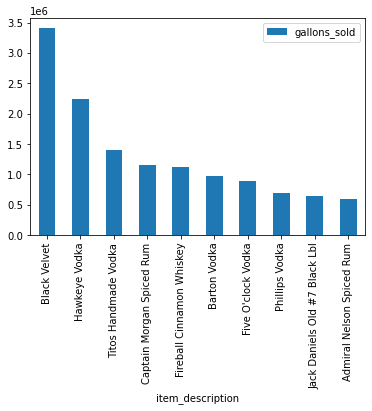

In [10]:
volumn_df.head(10).plot(kind='bar', x='item_description', y='gallons_sold');